In [2]:
import sys
sys.path.insert(1, '../../Side Stories/')
from unagi import Affin, Relu, Softmax_entropy, ha_1h, Adam

In [7]:
class Prasat:
    def __init__(self,m,eta):
        self.m = m
        self.chan = []
        for i in range(len(m)-1):
            self.chan.append(Affin(m[i],m[i+1],np.sqrt(2./m[i])))
            if(i<len(m)-2):
                self.chan.append(Relu())
        self.chan.append(Softmax_entropy())
        self.opt = Adam(self.param(),eta=eta)
    
    def rianru(self,X,z,X_truat,z_truat,n_thamsam=100,n_batch=50,ro=0):
        n = len(z)
        Z = ha_1h(z,self.m[-1])
        self.entropy = []
        self.khanaen_fuek = []
        self.khanaen_truat = []
        khanaen_sungsut = 0
        for o in range(n_thamsam):
            lueak = np.random.permutation(n)
            for i in range(0,n,n_batch):
                Xb = X[lueak[i:i+n_batch]]
                Zb = Z[lueak[i:i+n_batch]]
                entropy = self.ha_entropy(Xb,Zb)
                entropy.phraeyon()
                self.opt()
            entropy,khanaen_fuek = self.ha_entropy(X,Z,ao_khanaen=1)
            khanaen_truat = self.ha_khanaen(X_truat,z_truat)
            self.entropy.append(entropy.kha)
            self.khanaen_fuek.append(khanaen_fuek)
            self.khanaen_truat.append(khanaen_truat)
            print(u'รอบที่ %d. เอนโทรปี=%.2f, ทำนายข้อมูลฝึกแม่น=%.2f, ทำนายข้อมูลตรวจสอบแม่น=%.2f'%(o,entropy.kha,khanaen_fuek,khanaen_truat))
            
            if(khanaen_truat>khanaen_sungsut):
                khanaen_sungsut = khanaen_truat
                maiphoem = 0
            else:
                maiphoem += 1
            
            if(ro>0 and maiphoem>=ro):
                break
    
    def ha_entropy(self,X,Z,ao_khanaen=0):
        for c in self.chan[:-1]:
            X = c(X)
        if(ao_khanaen):
            return self.chan[-1](X,Z),(X.kha.argmax(1)==Z.argmax(1)).mean()
        return self.chan[-1](X,Z)
    
    def ha_khanaen(self,X,z):
        return (self.thamnai(X)==z).mean()
    
    def param(self):
        p = []
        for c in self.chan:
            if(hasattr(c,'param')):
                p.extend(c.param)
        return p
    
    def thamnai(self,X):
        for c in self.chan[:-1]:
            X = c(X)
        return X.kha.argmax(1)

In [11]:
from glob import glob
n = 1000
uri = '../../SAMPLE DATA/ruprang-raisi-25x25x1000x5/*/*.png'
X = np.array([plt.imread(x) for x in sorted(glob(uri))])
X = X.reshape(-1, 25*25)

In [17]:
z = np.arange(5).repeat(n)
np.random.seed(1)
random_select = np.random.permutation(5*n)
X_train, X_test = X[random_select[:4000]], X[random_select[4000:]]
z_train, z_test = z[random_select[:4000]], z[random_select[4000:]]


In [18]:
nn = Prasat(m=[625, 100, 100, 50, 6], eta=.002)
nn.rianru(X_train, z_train, X_test, z_test, 
         n_thamsam=200, n_batch=64, ro=20)

รอบที่ 0. เอนโทรปี=1.19, ทำนายข้อมูลฝึกแม่น=0.46, ทำนายข้อมูลตรวจสอบแม่น=0.47
รอบที่ 1. เอนโทรปี=1.05, ทำนายข้อมูลฝึกแม่น=0.52, ทำนายข้อมูลตรวจสอบแม่น=0.53
รอบที่ 2. เอนโทรปี=0.50, ทำนายข้อมูลฝึกแม่น=0.80, ทำนายข้อมูลตรวจสอบแม่น=0.80
รอบที่ 3. เอนโทรปี=0.50, ทำนายข้อมูลฝึกแม่น=0.78, ทำนายข้อมูลตรวจสอบแม่น=0.77
รอบที่ 4. เอนโทรปี=0.41, ทำนายข้อมูลฝึกแม่น=0.83, ทำนายข้อมูลตรวจสอบแม่น=0.83
รอบที่ 5. เอนโทรปี=0.36, ทำนายข้อมูลฝึกแม่น=0.85, ทำนายข้อมูลตรวจสอบแม่น=0.84
รอบที่ 6. เอนโทรปี=0.37, ทำนายข้อมูลฝึกแม่น=0.85, ทำนายข้อมูลตรวจสอบแม่น=0.84
รอบที่ 7. เอนโทรปี=0.31, ทำนายข้อมูลฝึกแม่น=0.87, ทำนายข้อมูลตรวจสอบแม่น=0.86
รอบที่ 8. เอนโทรปี=0.33, ทำนายข้อมูลฝึกแม่น=0.86, ทำนายข้อมูลตรวจสอบแม่น=0.85
รอบที่ 9. เอนโทรปี=0.39, ทำนายข้อมูลฝึกแม่น=0.82, ทำนายข้อมูลตรวจสอบแม่น=0.82
รอบที่ 10. เอนโทรปี=0.49, ทำนายข้อมูลฝึกแม่น=0.79, ทำนายข้อมูลตรวจสอบแม่น=0.77
รอบที่ 11. เอนโทรปี=0.32, ทำนายข้อมูลฝึกแม่น=0.86, ทำนายข้อมูลตรวจสอบแม่น=0.86
รอบที่ 12. เอนโทรปี=0.38, ทำนายข้อมูลฝึกแม่น=0.83, ทำนายข้อมูล

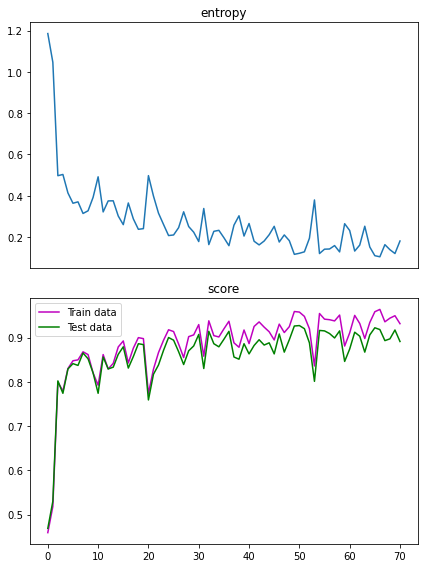

In [19]:
plt.figure(figsize=(6,8))
plt.subplot(211, xticks=[])
plt.plot(nn.entropy)
plt.title('entropy')

plt.subplot(212, )
plt.plot(nn.khanaen_fuek, 'm')
plt.plot(nn.khanaen_truat, 'g')
plt.title('score')

plt.legend(['Train data', 'Test data'])
plt.tight_layout()
plt.show()